In [1]:
cd /content/drive/app/task-gen/

[Errno 2] No such file or directory: '/content/drive/app/task-gen/'
/content


# Entities

In [0]:
%matplotlib inline

import spacy
import random
import seaborn as sns

from tqdm import tqdm
from spacy import displacy
from utils import hyperdash
from itertools import chain
from collections import Counter

## Spacy 101

In [0]:
SAMPLE_TEXT = '''But Google is starting from behind. The company made a late push \
into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa \
software, which runs on its Echo and Dot devices, have clear leads in \
consumer adoption.'''

In [0]:
nlp = spacy.load('en')
doc = nlp(SAMPLE_TEXT)

In [5]:
print([(token.text, token.lemma_, token.norm_, token.pos_, token.sentiment) for token in doc])

[('But', 'but', 'but', 'CCONJ', 0.0), ('Google', 'google', 'google', 'PROPN', 0.0), ('is', 'be', 'is', 'VERB', 0.0), ('starting', 'start', 'starting', 'VERB', 0.0), ('from', 'from', 'from', 'ADP', 0.0), ('behind', 'behind', 'behind', 'ADV', 0.0), ('.', '.', '.', 'PUNCT', 0.0), ('The', 'the', 'the', 'DET', 0.0), ('company', 'company', 'company', 'NOUN', 0.0), ('made', 'make', 'made', 'VERB', 0.0), ('a', 'a', 'gonna', 'DET', 0.0), ('late', 'late', 'late', 'ADJ', 0.0), ('push', 'push', 'push', 'NOUN', 0.0), ('into', 'into', 'into', 'ADP', 0.0), ('hardware', 'hardware', 'hardware', 'NOUN', 0.0), (',', ',', ',', 'PUNCT', 0.0), ('and', 'and', 'and', 'CCONJ', 0.0), ('Apple', 'apple', 'apple', 'PROPN', 0.0), ('’s', '’s', "'s", 'PART', 0.0), ('Siri', 'siri', 'siri', 'PROPN', 0.0), (',', ',', ',', 'PUNCT', 0.0), ('available', 'available', 'available', 'ADJ', 0.0), ('on', 'on', 'on', 'ADP', 0.0), ('iPhones', 'iphones', 'iphones', 'PROPN', 0.0), (',', ',', ',', 'PUNCT', 0.0), ('and', 'and', 'and',

In [6]:
print([chunk.text for chunk in doc.noun_chunks])

['Google', 'The company', 'a late push', 'hardware', 'Apple', 'Siri', 'iPhones', 'Amazon’s Alexa software', 'its Echo', 'Dot devices', 'clear leads', 'consumer adoption']


In [7]:
doc.user_data['title'] = 'Apple vs Google'
displacy.render(doc, style='ent', jupyter=True)

## Descs proceed

In [0]:
INFORMATIVE_POSES = {'NOUN', 'PROPN'}
LOG_STEP = 5000

In [9]:
%store -r descs
len(descs)

171148

In [0]:
def fetch_entity(desc):
    def norm(word):
        return word.strip().lower()
    
    my_stop_words = {"doesn\\'t", 'it\\', 'user\\'}
    def is_valid(word):
        return not nlp.vocab[word].is_stop and not 'dcnl' in word \
                    and not '_' in word and len(word) > 1 \
                    and not word in my_stop_words
    
    # Forming candidates
    doc = nlp(desc)
    ents = (ent.text for ent in doc.ents)
    lemmas = (token.lemma_ for token in doc \
              if token.pos_ in INFORMATIVE_POSES and not token.lemma_.startswith('-'))
    noun_chunks = (chunk.text for chunk in doc.noun_chunks)
    candidates = (norm(candidate) for candidate in chain(ents, lemmas, noun_chunks))
    
    return set(candidate for candidate in candidates if is_valid(candidate))

In [0]:
@hyperdash('[1.3.1] Collect entities')
def collect_entities(descs, *, exp):
    entities = []
    for i, desc in enumerate(tqdm(descs)):
        entities.append(fetch_entity(desc))
        if i % LOG_STEP == 0 or i == len(descs) - 1:
            exp.metric('step', i)
    return entities

In [12]:
%time entities = collect_entities(descs)
assert len(descs) == len(entities)
len(entities)

  0%|          | 0/171148 [00:00<?, ?it/s]

| step:   0.000000 |


  3%|▎         | 4998/171148 [01:40<55:47, 49.64it/s]

| step: 5000.000000 |


  6%|▌         | 10000/171148 [03:20<53:43, 50.00it/s]

| step: 10000.000000 |


  9%|▉         | 15000/171148 [05:01<52:14, 49.81it/s]

| step: 15000.000000 |


 12%|█▏        | 19996/171148 [06:40<50:28, 49.91it/s]

| step: 20000.000000 |


 15%|█▍        | 24994/171148 [08:19<48:41, 50.03it/s]

| step: 25000.000000 |


 18%|█▊        | 29995/171148 [09:59<47:01, 50.03it/s]

| step: 30000.000000 |


 20%|██        | 34998/171148 [11:39<45:20, 50.04it/s]

| step: 35000.000000 |


 23%|██▎       | 39997/171148 [13:18<43:38, 50.08it/s]

| step: 40000.000000 |


 26%|██▋       | 44999/171148 [14:58<41:57, 50.10it/s]

| step: 45000.000000 |


 29%|██▉       | 49999/171148 [16:38<40:20, 50.06it/s]

| step: 50000.000000 |


 32%|███▏      | 54997/171148 [18:18<38:39, 50.07it/s]

| step: 55000.000000 |


 35%|███▌      | 59998/171148 [19:58<36:59, 50.08it/s]

| step: 60000.000000 |


 38%|███▊      | 64994/171148 [21:37<35:19, 50.08it/s]

| step: 65000.000000 |


 41%|████      | 69996/171148 [23:17<33:39, 50.10it/s]

| step: 70000.000000 |


 44%|████▍     | 75000/171148 [24:56<31:58, 50.13it/s]

| step: 75000.000000 |


 47%|████▋     | 79998/171148 [26:36<30:18, 50.12it/s]

| step: 80000.000000 |


 50%|████▉     | 84997/171148 [28:17<28:40, 50.08it/s]

| step: 85000.000000 |


 53%|█████▎    | 89998/171148 [29:57<27:00, 50.07it/s]

| step: 90000.000000 |


 56%|█████▌    | 94999/171148 [31:36<25:20, 50.08it/s]

| step: 95000.000000 |


 58%|█████▊    | 99997/171148 [33:16<23:40, 50.09it/s]

| step: 100000.000000 |


 61%|██████▏   | 104995/171148 [34:55<22:00, 50.10it/s]

| step: 105000.000000 |


 64%|██████▍   | 109998/171148 [36:35<20:20, 50.11it/s]

| step: 110000.000000 |


 67%|██████▋   | 115000/171148 [38:15<18:40, 50.10it/s]

| step: 115000.000000 |


 70%|███████   | 119997/171148 [39:54<17:00, 50.11it/s]

| step: 120000.000000 |


 73%|███████▎  | 124996/171148 [41:33<15:20, 50.12it/s]

| step: 125000.000000 |


 76%|███████▌  | 129998/171148 [43:13<13:41, 50.12it/s]

| step: 130000.000000 |


 79%|███████▉  | 135000/171148 [44:53<12:01, 50.12it/s]

| step: 135000.000000 |


 82%|████████▏ | 139998/171148 [46:33<10:21, 50.11it/s]

| step: 140000.000000 |


 85%|████████▍ | 145000/171148 [48:13<08:41, 50.12it/s]

| step: 145000.000000 |


 88%|████████▊ | 150000/171148 [49:52<07:01, 50.12it/s]

| step: 150000.000000 |


 91%|█████████ | 154999/171148 [51:31<05:22, 50.14it/s]

| step: 155000.000000 |


 93%|█████████▎| 159996/171148 [53:10<03:42, 50.14it/s]

| step: 160000.000000 |


 96%|█████████▋| 164999/171148 [54:49<02:02, 50.16it/s]

| step: 165000.000000 |


 99%|█████████▉| 169996/171148 [56:28<00:22, 50.17it/s]

| step: 170000.000000 |


100%|█████████▉| 171144/171148 [56:51<00:00, 50.17it/s]

| step: 171147.000000 |


100%|██████████| 171148/171148 [56:51<00:00, 50.17it/s]


This run of [1.3.1] Collect entities ran for 0:56:51 and logs are available locally at: /content/.hyperdash/logs/1-3-1-collect-entities/1-3-1-collect-entities_2018-03-19t03-29-35-794272.log
CPU times: user 1h 16min 10s, sys: 31min 41s, total: 1h 47min 51s
Wall time: 56min 52s


171148

In [13]:
%store entities

Stored 'entities' (list)


## Analysis

In [0]:
@hyperdash('[1.3.2] Join entities')
def join_entities(entities, *, exp):
    cum_cnt = Counter()
    for i, entity in enumerate(tqdm(entities)):
        cum_cnt += Counter(entity)
        if i % LOG_STEP == 0 or i == len(descs) - 1:
            exp.metric('step', i)
    return cum_cnt

In [15]:
%time ecnts = join_entities(entities)
len(ecnts)

  0%|          | 0/171148 [00:00<?, ?it/s]

| step:   0.000000 |


  3%|▎         | 4996/171148 [00:02<01:08, 2412.03it/s]

| step: 5000.000000 |


  6%|▌         | 9993/171148 [00:07<02:02, 1313.69it/s]

| step: 10000.000000 |


  9%|▉         | 14978/171148 [00:17<03:05, 843.50it/s]

| step: 15000.000000 |


 12%|█▏        | 19976/171148 [00:35<04:31, 557.08it/s]

| step: 20000.000000 |


 15%|█▍        | 24987/171148 [01:00<05:52, 415.08it/s]

| step: 25000.000000 |


 18%|█▊        | 29997/171148 [01:30<07:03, 333.04it/s]

| step: 30000.000000 |


 20%|██        | 34991/171148 [02:03<08:01, 282.55it/s]

| step: 35000.000000 |


 23%|██▎       | 39996/171148 [02:42<08:53, 245.89it/s]

| step: 40000.000000 |


 26%|██▋       | 44994/171148 [03:25<09:35, 219.30it/s]

| step: 45000.000000 |


 29%|██▉       | 49991/171148 [04:12<10:11, 198.18it/s]

| step: 50000.000000 |


 32%|███▏      | 54991/171148 [05:03<10:40, 181.41it/s]

| step: 55000.000000 |


 35%|███▌      | 59995/171148 [05:57<11:02, 167.68it/s]

| step: 60000.000000 |


 38%|███▊      | 64995/171148 [06:56<11:20, 156.06it/s]

| step: 65000.000000 |


 41%|████      | 69996/171148 [07:58<11:31, 146.21it/s]

| step: 70000.000000 |


 44%|████▍     | 74993/171148 [09:04<11:38, 137.73it/s]

| step: 75000.000000 |


 47%|████▋     | 79999/171148 [10:14<11:39, 130.28it/s]

| step: 80000.000000 |


 50%|████▉     | 84999/171148 [11:27<11:37, 123.58it/s]

| step: 85000.000000 |


 53%|█████▎    | 89998/171148 [12:45<11:30, 117.61it/s]

| step: 90000.000000 |


 56%|█████▌    | 95000/171148 [14:05<11:18, 112.30it/s]

| step: 95000.000000 |


 58%|█████▊    | 99996/171148 [15:29<11:01, 107.60it/s]

| step: 100000.000000 |


 61%|██████▏   | 104998/171148 [16:57<10:41, 103.17it/s]

| step: 105000.000000 |


 64%|██████▍   | 109996/171148 [18:28<10:16, 99.19it/s]

| step: 110000.000000 |


 67%|██████▋   | 115000/171148 [20:03<09:47, 95.56it/s]

| step: 115000.000000 |


 70%|███████   | 120000/171148 [21:40<09:14, 92.25it/s]

| step: 120000.000000 |


 73%|███████▎  | 124998/171148 [23:21<08:37, 89.17it/s]

| step: 125000.000000 |


 76%|███████▌  | 129999/171148 [25:07<07:57, 86.24it/s]

| step: 130000.000000 |


 79%|███████▉  | 134999/171148 [26:56<07:12, 83.52it/s]

| step: 135000.000000 |


 82%|████████▏ | 139999/171148 [28:48<06:24, 81.01it/s]

| step: 140000.000000 |


 85%|████████▍ | 144999/171148 [30:43<05:32, 78.66it/s]

| step: 145000.000000 |


 88%|████████▊ | 149999/171148 [32:41<04:36, 76.46it/s]

| step: 150000.000000 |


 91%|█████████ | 154998/171148 [34:42<03:36, 74.43it/s]

| step: 155000.000000 |


 93%|█████████▎| 159997/171148 [36:46<02:33, 72.50it/s]

| step: 160000.000000 |


 96%|█████████▋| 165000/171148 [38:55<01:27, 70.65it/s]

| step: 165000.000000 |


 99%|█████████▉| 169997/171148 [41:08<00:16, 68.86it/s]

| step: 170000.000000 |


100%|█████████▉| 171145/171148 [41:39<00:00, 68.46it/s]

| step: 171147.000000 |


100%|██████████| 171148/171148 [41:40<00:00, 68.46it/s]


This run of [1.3.2] Join entities ran for 0:41:40 and logs are available locally at: /content/.hyperdash/logs/1-3-2-join-entities/1-3-2-join-entities_2018-03-19t04-26-33-522404.log
CPU times: user 41min 28s, sys: 24 s, total: 41min 52s
Wall time: 41min 41s


229910

In [16]:
%store ecnts

Stored 'ecnts' (Counter)


In [17]:
ecnts.most_common(50)

[('return', 18611),
 ('test', 17629),
 ('list', 10556),
 ('object', 10079),
 ('value', 8947),
 ('file', 8515),
 ('method', 8392),
 ('function', 7848),
 ('param', 7701),
 ('string', 7617),
 ('instance', 7296),
 ('user', 6737),
 ('datum', 5610),
 ('parameter', 5391),
 ('request', 5375),
 ('returns', 5009),
 ('type', 4780),
 ('argument', 4480),
 ('args', 4393),
 ('a list', 4271),
 ('number', 4176),
 ('default', 4125),
 ('error', 3943),
 ('message', 3702),
 ('class', 3554),
 ('path', 3528),
 ('api', 3483),
 ('field', 3368),
 ('response', 3207),
 ('dictionary', 3142),
 ('result', 3125),
 ('dict', 3104),
 ('rtype', 3086),
 ('information', 3084),
 ('key', 2991),
 ('attribute', 2980),
 ('version', 2922),
 ('exception', 2794),
 ('command', 2784),
 ('state', 2745),
 ('tests', 2728),
 ('server', 2677),
 ('model', 2529),
 ('connection', 2497),
 ('module', 2476),
 ('line', 2452),
 ('resource', 2448),
 ('page', 2438),
 ('time', 2430),
 ('this method', 2415)]

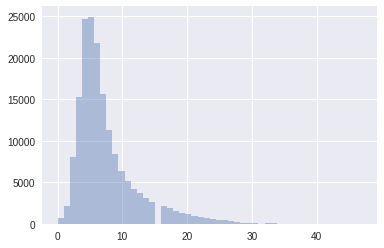

In [18]:
sns.distplot([len(entity) for entity in entities], hist=True, kde=False);

In [19]:
entities = [sorted(sorted(entity, key=lambda x: ecnts[x])[:5]) 
            for entity in tqdm(entities)]
assert len(descs) == len(entities)
len(entities)

100%|██████████| 171148/171148 [00:01<00:00, 115321.10it/s]


171148

In [20]:
edescs = [', '.join(entity) + ' | ' + desc for desc, entity in zip(descs, entities)]
assert len(descs) == len(edescs)
len(edescs)

171148

In [21]:
random.sample(edescs, 10)

['node kinds, param kinds, param limit, random content nodes, randomly selected content dictionaries | Convenience function for returning random content nodes for use in testing DCNL :param kinds: A list of node kinds to select from. DCNL :param limit: The maximum number of items to return. DCNL :return: A list of randomly selected content dictionaries.',
 'char, chars, entity refs, ref, tag name | Add child with tag name and content. DCNL Convert replaces entity refs to chars.',
 'permission, roleinstance, the permission, twilio.rest.chat.v1.service.role.roleinstance, unicode | Update the RoleInstance DCNL :param unicode permission: The permission DCNL :returns: Updated RoleInstance DCNL :rtype: twilio.rest.chat.v1.service.role.RoleInstance',
 'callback, parameter, sensor, sensor test parameters, test | Callback for sensor test parameters',
 'chromosome, segment, the current chromosome segment | Draw the current chromosome segment.',
 'a ratemeasurer, rate, ratemeasurer, sample, the r

In [22]:
%store edescs

Stored 'edescs' (list)
